In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # ignore specific future warnings
warnings.filterwarnings("ignore",category=FutureWarning)


In [2]:
# load the data
glass = pd.read_excel('glass.xlsx',sheet_name='glass')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass.shape

(214, 10)

In [4]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass.nunique()

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

In [7]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

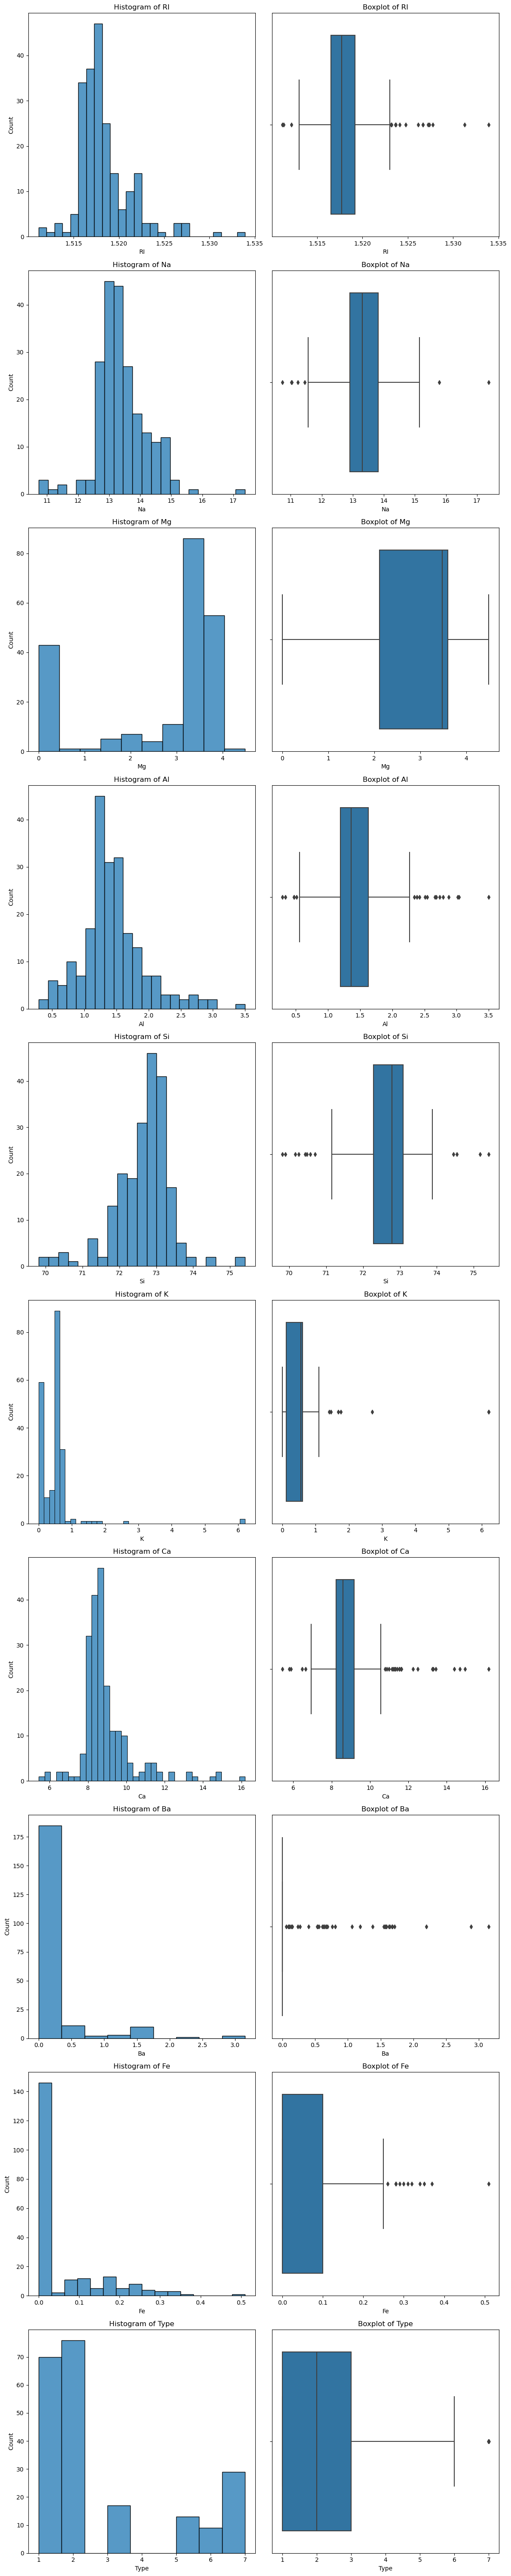

In [8]:
##Create histograms or boxplots to visualize the distributions of data

#subplots
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(12, 60))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create histograms and boxplots
for i, col in enumerate(glass.columns):
    # Histogram
    sns.histplot(glass[col], kde=False, ax=axes[i*2],)
    axes[i*2].set_title(f'Histogram of {col}')
    
    # Boxplot
    sns.boxplot(x=glass[col], ax=axes[i*2+1])
    axes[i*2+1].set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

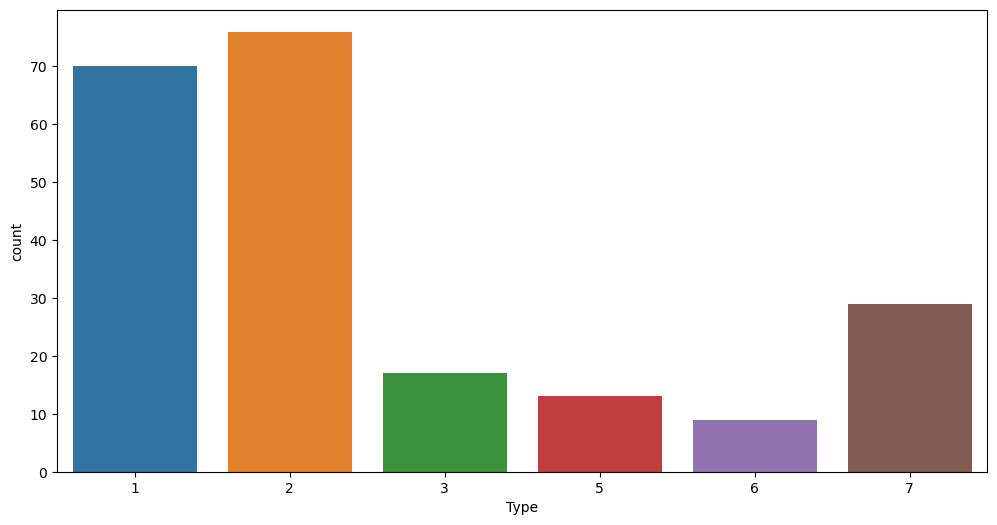

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(data=glass, x=glass['Type'])
plt.show()

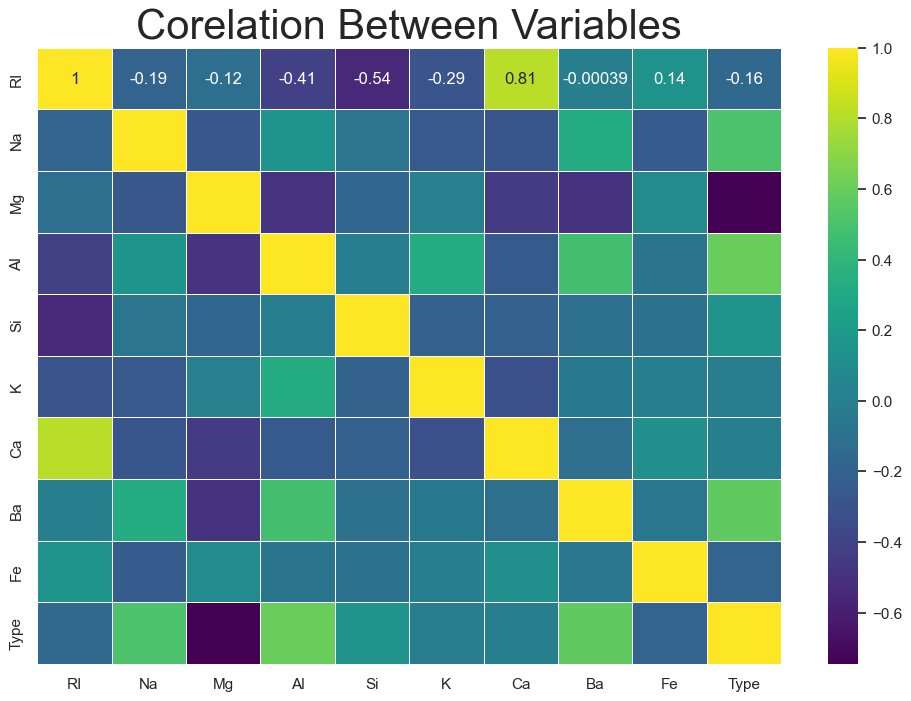

In [11]:
# correlation heatmaps to explore relationships between pairs of variables.
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (12, 8) 
sns.heatmap(glass.corr(numeric_only=True), annot = True, linewidths=.5, cmap="viridis")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

In [12]:
# split the data
X = glass.iloc[:,0:8]
y = glass['Type']

In [14]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
x_scal = scal.fit_transform(X)

# convert the scaled data back into a dataframe
xscal_df = pd.DataFrame(x_scal, columns=X.columns)
# xscal_df.head()

In [15]:
# split the data into training and testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(xscal_df,y,test_size=0.20,random_state=41)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((171, 8), (43, 8), (171,), (43,))

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [17]:
rnd_model = RandomForestClassifier(n_estimators=50,max_depth=8)   # initialize the model
rnd_model.fit(X_train,y_train)                                    # fit the model
yhat_train = rnd_model.predict(X_train)                           

In [18]:
yhat_train

array([2, 3, 1, 1, 7, 2, 1, 5, 1, 2, 7, 1, 2, 7, 1, 2, 5, 2, 2, 3, 1, 7,
       2, 7, 2, 1, 7, 7, 2, 1, 7, 2, 1, 5, 1, 2, 1, 2, 7, 7, 7, 3, 2, 2,
       1, 3, 5, 7, 6, 1, 1, 1, 2, 7, 3, 1, 1, 1, 1, 7, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 5, 5, 7, 1, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 2, 6, 2, 2, 3, 1, 2, 2, 2, 2, 1, 1, 5, 2, 5, 2, 3, 5, 2, 1,
       6, 1, 1, 5, 2, 2, 7, 1, 2, 2, 2, 2, 2, 1, 1, 2, 7, 7, 3, 2, 1, 3,
       2, 7, 2, 1, 2, 2, 1, 1, 3, 7, 2, 1, 1, 1, 2, 2, 6, 6, 2, 2, 6, 2,
       7, 2, 2, 7, 6, 7, 2, 6, 2, 1, 3, 2, 1, 2, 2, 5, 7], dtype=int64)

In [19]:
cm = confusion_matrix(y_train,yhat_train)  # on training data
cm

array([[54,  0,  0,  0,  0,  0],
       [ 0, 62,  0,  0,  0,  0],
       [ 1,  0, 11,  0,  0,  0],
       [ 0,  0,  0, 11,  0,  0],
       [ 0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0, 24]], dtype=int64)

In [20]:
print(classification_report(y_train,yhat_train))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        54
           2       1.00      1.00      1.00        62
           3       1.00      0.92      0.96        12
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00        24

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [21]:
# on testing data
yhat_test = rnd_model.predict(X_test)
con_mat = confusion_matrix(y_test,yhat_test)
con_mat

array([[15,  0,  1,  0,  0,  0],
       [ 2, 11,  0,  0,  0,  1],
       [ 3,  1,  1,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  4]], dtype=int64)

In [22]:
print(classification_report(y_test,yhat_test))

              precision    recall  f1-score   support

           1       0.75      0.94      0.83        16
           2       0.85      0.79      0.81        14
           3       0.50      0.20      0.29         5
           5       0.50      0.50      0.50         2
           6       1.00      1.00      1.00         1
           7       0.80      0.80      0.80         5

    accuracy                           0.77        43
   macro avg       0.73      0.70      0.71        43
weighted avg       0.75      0.77      0.75        43



# Adaboost

In [24]:
from sklearn.ensemble import AdaBoostClassifier 
adb_model = AdaBoostClassifier(n_estimators=100,learning_rate=0.6)
adb_model.fit(X_train,y_train)
yhat_train = adb_model.predict(X_train)

In [25]:
yhat_train

array([1, 1, 2, 1, 7, 2, 1, 5, 1, 2, 7, 1, 2, 7, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 7, 1, 1, 7, 2, 2, 2, 7, 2, 1, 2, 2, 2, 1, 2, 7, 7, 7, 2, 2, 2,
       1, 1, 2, 7, 6, 1, 1, 2, 2, 7, 2, 1, 1, 1, 1, 7, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 7, 1, 1, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 6, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 5, 1, 2, 2, 1, 2, 2, 1,
       6, 1, 1, 2, 2, 1, 7, 1, 2, 2, 1, 2, 2, 1, 1, 2, 7, 7, 2, 2, 2, 1,
       1, 7, 1, 1, 2, 2, 1, 1, 1, 7, 1, 2, 2, 2, 2, 1, 6, 6, 2, 2, 6, 5,
       7, 2, 2, 7, 6, 7, 2, 6, 6, 1, 2, 2, 1, 2, 2, 5, 7], dtype=int64)

In [26]:
cm = confusion_matrix(y_train,yhat_train) # on training 
cm

array([[44, 10,  0,  0,  0,  0],
       [13, 47,  0,  1,  1,  0],
       [ 8,  4,  0,  0,  0,  0],
       [ 0,  8,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  8,  0],
       [ 1,  1,  0,  0,  0, 22]], dtype=int64)

In [27]:
print(classification_report(y_train,yhat_train))

              precision    recall  f1-score   support

           1       0.67      0.81      0.73        54
           2       0.67      0.76      0.71        62
           3       0.00      0.00      0.00        12
           5       0.75      0.27      0.40        11
           6       0.89      1.00      0.94         8
           7       1.00      0.92      0.96        24

    accuracy                           0.73       171
   macro avg       0.66      0.63      0.62       171
weighted avg       0.68      0.73      0.69       171



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
yhat_test = adb_model.predict(X_test)          # on testing dataset
con_mat = confusion_matrix(y_test,yhat_test)
con_mat

array([[14,  2,  0,  0,  0,  0],
       [ 5,  8,  0,  1,  0,  0],
       [ 4,  1,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  1,  0,  3]], dtype=int64)

In [29]:
print(classification_report(y_test,yhat_test))

              precision    recall  f1-score   support

           1       0.61      0.88      0.72        16
           2       0.57      0.57      0.57        14
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         1
           7       1.00      0.60      0.75         5

    accuracy                           0.60        43
   macro avg       0.53      0.51      0.51        43
weighted avg       0.55      0.60      0.56        43



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
